## Imports

In [44]:
import pandas as pd
import ast
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier

## Lendo arquivos

In [71]:
df = pd.read_csv("movies_metadata.csv")
df2 = pd.read_csv("credits.csv")

/Users/varella/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Manipulando JSON

Dentre as colunas de nossa tabela, alguns features esatavam codificados em JSON. Para decodificá-los, foi necessário com os códigos abaixo. Dessa forma, extraímos os dados de atores principais de cada produção, os diretores, a produtora e o gênero de cada um.

In [73]:
atores = []
for e in range(0,len(df2["cast"])):
        data_dict = ast.literal_eval(df2["cast"][e])
        for palavras in data_dict:
            atores.append(palavras['name']) 

In [47]:
#pprint(data_dict)

In [48]:
# data_dict[1]['name']

In [49]:
df['original_title'].head()

0                      Toy Story
1                        Jumanji
2               Grumpier Old Men
3              Waiting to Exhale
4    Father of the Bride Part II
Name: original_title, dtype: object

In [50]:
df.drop_duplicates(subset ="original_title", 
                     keep = 'first', inplace = True) 
df["original_title"].value_counts().value_counts()


1    43373
Name: original_title, dtype: int64

In [51]:
df['bilhao'] = df.revenue > 1e9



In [52]:
df_0 = df[df['revenue'] > 0]
df_budget = df_0[df_0['budget'] != '0']
df_clean = df_budget[df_budget['production_companies'] != '[]']
df_super_clean = df_clean[df_clean['genres'] != '[]']
df_super_clean

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,bilhao
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,3.735540e+08,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,False
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,2.627972e+08,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,False
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,8.145216e+07,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,False
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1.874368e+08,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,False
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,6.435017e+07,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0,False
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,3.521940e+08,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,False
10,False,NaN,62000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,9087,tt0112346,en,The American President,"Widowed U.S. president Andrew Shepherd, one of...",...,1.078795e+08,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Why can't the most powerful man in the world h...,The American President,False,6.5,199.0,False
13,False,NaN,44000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",NaN,10858,tt0113987,en,Nixon,An all-star cast powers this epic look at Amer...,...,1.368176e+07,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Triumphant in Victory, Bitter in Defeat. He Ch...",Nixon,False,7.1,72.0,False
14,False,NaN,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,1.001732e+07,119.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,False
15,False,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,1.161124e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,False


In [56]:
df_mega_clean = df_super_clean[["genres","budget","revenue","production_companies"]]
df_mega_clean['budget'] = df_mega_clean['budget'].astype(float)
df_mega_clean

/Users/varella/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,genres,budget,revenue,production_companies
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000.0,3.735540e+08,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000.0,2.627972e+08,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000.0,8.145216e+07,[{'name': 'Twentieth Century Fox Film Corporat...
5,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",60000000.0,1.874368e+08,"[{'name': 'Regency Enterprises', 'id': 508}, {..."
8,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",35000000.0,6.435017e+07,"[{'name': 'Universal Pictures', 'id': 33}, {'n..."
9,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",58000000.0,3.521940e+08,"[{'name': 'United Artists', 'id': 60}, {'name'..."
10,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",62000000.0,1.078795e+08,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam..."
13,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",44000000.0,1.368176e+07,"[{'name': 'Hollywood Pictures', 'id': 915}, {'..."
14,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",98000000.0,1.001732e+07,"[{'name': 'Le Studio Canal+', 'id': 183}, {'na..."
15,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",52000000.0,1.161124e+08,"[{'name': 'Universal Pictures', 'id': 33}, {'n..."


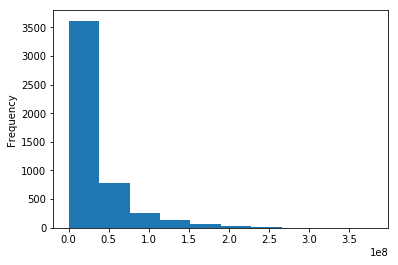

In [70]:
df_mega_clean.budget.plot.hist(density = False)

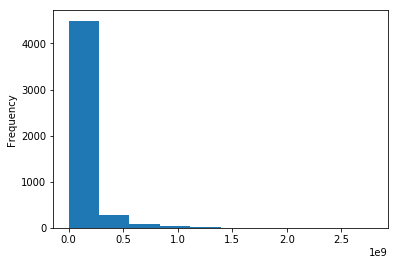

In [69]:
df_mega_clean.revenue.plot.hist(density = False)

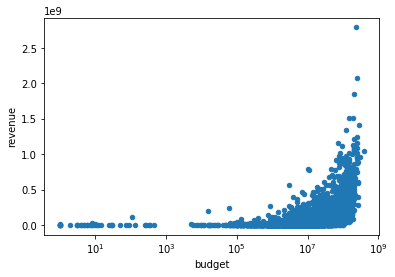

In [67]:
df_mega_clean.plot.scatter(x="budget", y = "revenue",  logx=True)

# Random Forest

# One Hot Encoder